In [1]:
#importing necessary packages.
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
from sklearn.tree import DecisionTreeRegressor
import statistics

In [2]:
boston = load_boston()#loading the boston dataset.
x=boston.data #independent variables
y=boston.target #target variable

#Here we are Randomly creating 30 samples from the whole boston data points
#In each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/BTVYXQ1.jpg/)

In [3]:
#This function generating_samples generates samples final_sampled_data,final_target_data,selecting_rows,selectig_coloumns.
def generating_samples(input_data,target_data):
  #generating 303 rows from 503 rows. 
  selecting_rows=np.random.choice(range(503),303,replace=False)
  #replecating the rows of size 203.
  replecating_rows=np.random.choice(range(303),203,replace=False)
  #generating coloumns of size 5.
  selecting_coloumns=np.random.choice(range(13),5,replace=False)
  #appending the data into rows from dataset.
  sample_data=input_data[selecting_rows[:,None],selecting_coloumns]
  target_of_sample_data=target_data[selecting_rows]
  #appending the replicated rows from 303 rows and coloumns.
  replicated_sampled_data=sample_data[replecating_rows]
  targeted_replicated_sampled_data=target_of_sample_data[replecating_rows]
  #stacking the data that needs to be trained.
  final_sampled_data=np.vstack((sample_data,replicated_sampled_data))
  #stacking the target data together.
  final_target_data=np.vstack((target_of_sample_data.reshape(-1,1),targeted_replicated_sampled_data.reshape(-1,1)))
  return final_sampled_data,final_target_data,selecting_rows,selecting_coloumns

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [4]:
# Use generating function to create 30 samples 
# store these created samples in a list
def generating():
  list_input_data =[]
  list_output_data =[]
  list_selected_row= []
  list_selected_columns=[]
  for i in range(0,30):
    a,b,c,d=generating_samples(x,y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)
  return list_input_data,list_output_data,list_selected_row,list_selected_columns
list_input_data,list_output_data,list_selected_row,list_selected_columns=generating()

In [5]:
print(len(list_selected_columns))

30


<font color='cyan'> <b>Grader function - 2 </b></font>

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

In [6]:
#This function finall creates 30 models and predicts the value for each point in the dataset(x) and gets the median of it and compares it with the actual value(y).
def finall():
  m=[]
  for ele3 in range(len(x)):
    clf=DecisionTreeRegressor()
    for ele4 in range(30):
      p=[]
      input_x=list_input_data[ele4]
      input_y=list_output_data[ele4]
      clf.fit(input_x,input_y)
      predicted=clf.predict(x[ele3,list_selected_columns[ele4].reshape(1,-1)])
      p.append(predicted)
      mids=statistics.median(p)
    m.append(mids)
  return m

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

In [7]:
#In MSE1 we are storing the final output of the function finall
MSE1=finall()
#calculating the mean square error using sklearn .
mse1=mean_squared_error(y,MSE1)

In [8]:
print("mean square eroor: ",mse1)

mean square eroor:  11.378833992094862


<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

calculating the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

In [9]:
#This function final2 is the modified version of the function final , here the model  predicts the value of the point if the point is not here in the sample its get for training and appends the preedicted output to the list and compares it to the actual values(y)
def final2():
  m=[]
  for ele5 in range(len(x)):
    clf=DecisionTreeRegressor()
    for ele4 in range(30):
      if x[ele5,list_selected_columns[ele4].reshape(1,-1)] in list_input_data[ele4]:
        p=[]
        input_x=list_input_data[ele4]
        input_y=list_output_data[ele4]
        clf.fit(input_x,input_y)
        predicted=clf.predict(x[ele5,list_selected_columns[ele4].reshape(1,-1)])
        p.append(predicted)
        mids=statistics.median(p)
      else:
        continue
    m.append(mids)
  return m

In [10]:
#training the model and get the error value
MSE2=final2()
mse2=mean_squared_error(y,MSE2)

In [11]:
print("OBB score: ",mse2)

OBB score:  11.6248023715415


In [12]:
#Here in this function ci_ we are training the model finall and final2  for 30 times and storing their mse and obb scores. 
from tqdm import tqdm
def ci_():
  mse__=[]
  obb__=[]
  for i in tqdm(range(30)):
    list_input_data,list_output_data,list_selected_row,list_selected_columns=generating()
    MSE1=finall()
    mse1=mean_squared_error(y,MSE1)
    MSE2=final2()
    mse2=mean_squared_error(y,MSE2)
    mse__.append(mse1)
    obb__.append(mse2)
  return mse__,obb__
msee,obbb=ci_()


100%|██████████| 30/30 [21:15<00:00, 42.53s/it]


In [15]:
#Splilting the data into batches.
def get_means_of_n_samples_with_m_size(data, n, m):
    sample_mean_m_samples_n_ele = []
    for i in range(0,n):
        samples = random.sample(range(0, data.shape[0]), m)
        sample_mean_m_samples_n_ele.append(data[samples].mean())
    return sample_mean_m_samples_n_ele

In [16]:
#Plotting the graph
def central_limit_theorem(data, population_mean , i, j, color, key):
    sns.distplot(np.array(data), color=color, ax=axs[i, j])
    axs[i, j].axvline(population_mean, linestyle="--", color='r', label="p_mean")
    axs[i, j].axvline(np.array(data).mean(), linestyle="-.", color='b', label="s_mean")
    axs[i, j].set_title(key)
    axs[i, j].legend()


In [ ]:
#Converting mse and obb score lists in to numpy array.
msee=np.array(msee)
obbb=np.array(obbb)

In [78]:
sample_means1 = dict()

In [79]:
sample_means1['100samples_5ele'] = get_means_of_n_samples_with_m_size(msee,100, 5)
sample_means1['1000samples_5ele'] = get_means_of_n_samples_with_m_size(msee,1000, 5)

sample_means1['100samples_15ele'] = get_means_of_n_samples_with_m_size(msee,100, 15)
sample_means1['1000samples_15ele'] = get_means_of_n_samples_with_m_size(msee,1000, 15)

sample_means1['100samples_25ele'] = get_means_of_n_samples_with_m_size(msee,100, 25)
sample_means1['1000samples_25ele'] = get_means_of_n_samples_with_m_size(msee,1000, 25)

number of mean square error values:  30


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


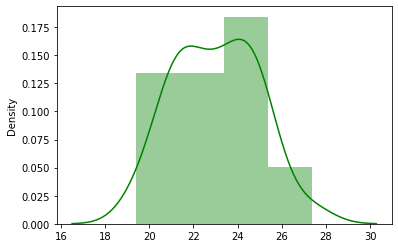

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
#plotting the graph
print("number of mean square error values: ",len(msee))
sns.distplot(msee, color='g')
plt.show()

In [14]:
#20-26.5

In [27]:
# population mean
population_mean = np.round(msee.mean(),3)
# population std
population_std = np.round(msee.std(),3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

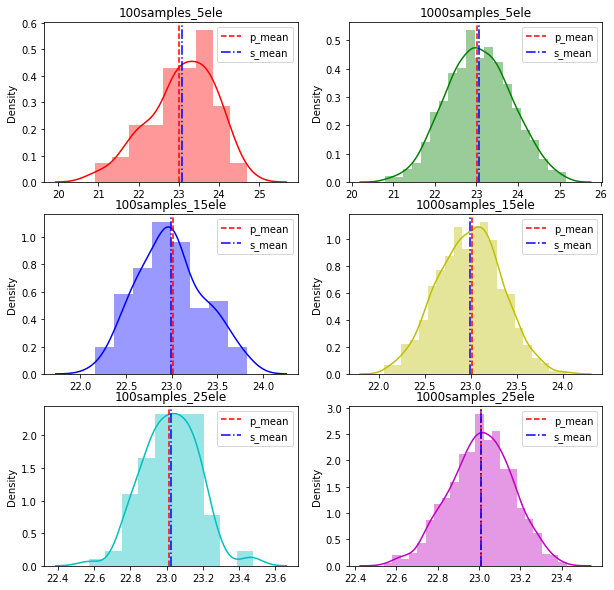

In [80]:
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,5), (1000, 5), (100, 10), (1000, 10), (100, 25), (100, 25)]
fig, axs = plt.subplots(3, 2,  figsize=(10, 10))
for i, key in enumerate(sample_means1.keys()):
    central_limit_theorem(sample_means1[key], population_mean , plt_grid[i][0], plt_grid[i][1] , colrs[i], key)
plt.show()

In [105]:
from prettytable import PrettyTable
x = PrettyTable()
x = PrettyTable(["#samples_name", "P_Mean", "Sampel mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for i, key in enumerate(sample_means1.keys()):
    sample_mean = np.round(np.array(sample_means1[key]).mean(), 3)
    sample_std = np.round(np.array(sample_means1[key]).std(), 3)
    population_std_est = np.round(population_std/np.sqrt(sample_sizes[i][1]), 3)
    
    row = []
    row.append(key)
    row.append(population_mean)
    row.append(sample_mean)
    row.append(population_std)
    row.append(sample_std)
    row.append(str(sample_mean)+u"\u2248"+str(population_mean))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    x.add_row(row)
print(x)

+-------------------+--------+-------------+-------+------------+---------------+--------------+
|   #samples_name   | P_Mean | Sampel mean | P_Std | Sample Std |    mu_x≈mu    | std_x≈std/√n |
+-------------------+--------+-------------+-------+------------+---------------+--------------+
|  100samples_5ele  | 23.011 |    23.08    | 1.884 |   0.817    |  23.08≈23.011 | 0.817≈0.843  |
|  1000samples_5ele | 23.011 |    23.058   | 1.884 |    0.79    | 23.058≈23.011 |  0.79≈0.843  |
|  100samples_15ele | 23.011 |    22.99    | 1.884 |   0.362    |  22.99≈23.011 | 0.362≈0.596  |
| 1000samples_15ele | 23.011 |    22.99    | 1.884 |   0.344    |  22.99≈23.011 | 0.344≈0.596  |
|  100samples_25ele | 23.011 |    23.022   | 1.884 |   0.152    | 23.022≈23.011 | 0.152≈0.377  |
| 1000samples_25ele | 23.011 |    23.009   | 1.884 |   0.154    | 23.009≈23.011 | 0.154≈0.377  |
+-------------------+--------+-------------+-------+------------+---------------+--------------+


number of OBB error values:  30




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


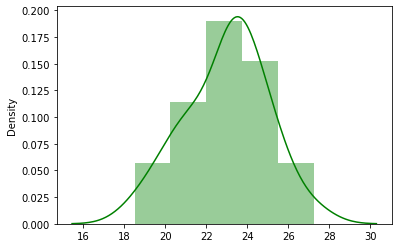

In [83]:
print("number of OBB error values: ",len(obbb))
print("\n")
sns.distplot(obbb, color='g')
plt.show()

In [84]:
# population mean
population_mean1 = np.round(obbb.mean(),3)
# population std
population_std1 = np.round(obbb.std(),3)

In [86]:
sample_means2=dict()

In [87]:
sample_means2['100samples_5ele'] = get_means_of_n_samples_with_m_size(obbb,100, 5)
sample_means2['1000samples_5ele'] = get_means_of_n_samples_with_m_size(obbb,1000, 5)

sample_means2['100samples_15ele'] = get_means_of_n_samples_with_m_size(obbb,100, 15)
sample_means2['1000samples_15ele'] = get_means_of_n_samples_with_m_size(obbb,1000, 15)

sample_means2['100samples_25ele'] = get_means_of_n_samples_with_m_size(obbb,100, 25)
sample_means2['1000samples_25ele'] = get_means_of_n_samples_with_m_size(obbb,1000, 25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

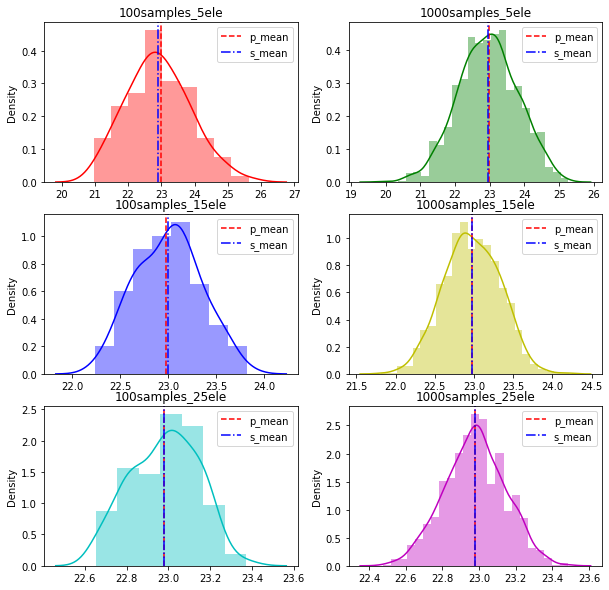

In [106]:
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,5), (1000, 5), (100, 10), (1000, 10), (100, 25), (100, 25)]
fig, axs = plt.subplots(3, 2,  figsize=(10, 10))
for i, key in enumerate(sample_means2.keys()):
    central_limit_theorem(sample_means2[key], population_mean1 , plt_grid[i][0], plt_grid[i][1] , colrs[i], key)
plt.show()

In [108]:
x1 = PrettyTable()
x1 = PrettyTable(["#samples_name", "P_Mean", "Sample mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])
for i, key in enumerate(sample_means2.keys()):
    sample_mean1 = np.round(np.array(sample_means2[key]).mean(), 3)
    sample_std1 = np.round(np.array(sample_means2[key]).std(), 3)
    population_std_est1 = np.round(population_std1/np.sqrt(sample_sizes[i][1]), 3)
    
    row1 = []
    row1.append(key)
    row1.append(population_mean1)
    row1.append(sample_mean1)
    row1.append(population_std1)
    row1.append(sample_std)
    row1.append(str(sample_mean1)+u"\u2248"+str(population_mean1))
    row1.append(str(sample_std1)+u"\u2248"+str(population_std_est1))
    x1.add_row(row1)
print(x1)

+-------------------+--------+-------------+-------+------------+---------------+--------------+
|   #samples_name   | P_Mean | Sample mean | P_Std | Sample Std |    mu_x≈mu    | std_x≈std/√n |
+-------------------+--------+-------------+-------+------------+---------------+--------------+
|  100samples_5ele  | 22.979 |    22.91    | 1.974 |   0.154    |  22.91≈22.979 | 0.947≈0.883  |
|  1000samples_5ele | 22.979 |    22.952   | 1.974 |   0.154    | 22.952≈22.979 | 0.856≈0.883  |
|  100samples_15ele | 22.979 |    23.003   | 1.974 |   0.154    | 23.003≈22.979 | 0.338≈0.624  |
| 1000samples_15ele | 22.979 |    22.972   | 1.974 |   0.154    | 22.972≈22.979 | 0.359≈0.624  |
|  100samples_25ele | 22.979 |    22.98    | 1.974 |   0.154    |  22.98≈22.979 |  0.16≈0.395  |
| 1000samples_25ele | 22.979 |    22.977   | 1.974 |   0.154    | 22.977≈22.979 | 0.165≈0.395  |
+-------------------+--------+-------------+-------+------------+---------------+--------------+


We had created 30 models by using 30 samples. Here, we send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

In [15]:
#data_point that have to be predicted.
data_point=[0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]

13


In [111]:
Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 

#predicting the value of single house.
#Training the model and predicting the value.
def final3():
  m=[]
  clf=DecisionTreeRegressor()
  for ele4 in range(30):
    input_x=list_input_data[ele4]
    input_y=list_output_data[ele4]
    clf.fit(input_x,input_y)
    predicted=clf.predict(np.random.choice(data_point,5,replace=False).reshape(1,-1))
    m.append(predicted)
  p=statistics.median(m)
  return p

In [112]:
#Getting the value.
drf=final3()

In [115]:
print("The predicted value:",drf)

The predicted value: [21.15]


<br><br><br>

observations in indetail

#observation:
##1:
###### Here in  1 we get 21.4,21.6 ,mse and obb scores respectively as the data is split widely the radom tree regressor is not up to mark for predicting the values. As we have 506 data points we may get better results if we increase the number of samples.

##2:
###### If we obsserve the plot of Mean Square Error score ,follows gaussian when we have 1000 samples with 5 elements each. And when we split the data into 10,100,1000 samples of  5,15,25  sizes we can observe the the population mean and standard mean almost merge in each of the case(nearly).And as number of samples increase (1000) we can see the graph tends to be gaussian (nearly). by this if we increase the number of samples with max length we can attain gaussian results. we can say 23 is the mean and roughly 0.5  is the standard deviation.

###### When we observe the plot of obb score the graph follows gaussian when we have 100 samples with 5 elements.here also both the sample mean and population mean are almost same when we have high number of samples. here 23 is the mean and 0.5-0.6 is the standard deviation.

##3:
#######  here we get the value as 21.5